In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Below command tells the IPython environment to draw the plots immediately after the current cell. 
#The drawn plots are shown below the code and stored in the notebook document for future reference
%matplotlib inline

#Adjust the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (15,12)

In [2]:
#Read the data
df= pd.read_csv(r'C:\Users\sarmistha\Documents\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Checking if there is any missing data

for col in df.columns:
    missing_prcnt = (df[col].isnull().mean())*100 #Calculating the missing percentage of each column when the value is null, also can be done as np.mean(df[col].isnull())
    print('{} :- {}%'.format(col, missing_prcnt))

name :- 0.0%
rating :- 1.00417318727%
genre :- 0.0%
year :- 0.0%
released :- 0.0260824204486%
score :- 0.0391236306729%
votes :- 0.0391236306729%
director :- 0.0%
writer :- 0.0391236306729%
star :- 0.0130412102243%
country :- 0.0391236306729%
budget :- 28.312467397%
gross :- 2.46478873239%
company :- 0.221700573813%
runtime :- 0.0521648408972%


In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

#Deleting the rows with missing values
df = df.dropna(how='any',axis=0)  

In [6]:
#Checking if there is any missing data after removing missing value rows

for col in df.columns:
    missing_prcnt = np.mean(df[col].isnull())*100 
    print('{} :- {}%'.format(col, missing_prcnt))

name :- 0.0%
rating :- 0.0%
genre :- 0.0%
year :- 0.0%
released :- 0.0%
score :- 0.0%
votes :- 0.0%
director :- 0.0%
writer :- 0.0%
star :- 0.0%
country :- 0.0%
budget :- 0.0%
gross :- 0.0%
company :- 0.0%
runtime :- 0.0%


In [7]:
#Data types present in the dataframe
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#Changing the datatype of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
#Create correct year column as some of the year in released columns are different to year column

df['yearCorrect'] = df['released'].astype(str).str.split(', ').str[-1].str[:4]

In [11]:
#Sort the dataframe in highest gross value
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

df = df.sort_values(by=['gross'], inplace= False, ascending = False)

In [12]:
#Show all the rows in the dataframe 

pd.set_option('display.max_rows', None)
#df

In [13]:
#Drop any duplicates present in the dataframe

df= df.drop_duplicates()

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


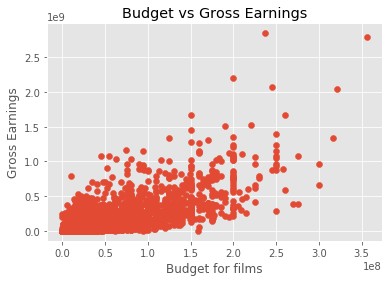

In [15]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings')

plt.show()

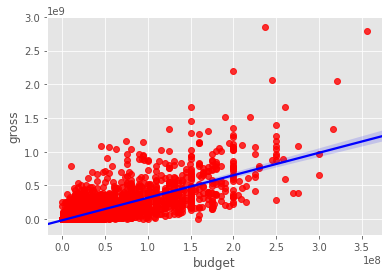

In [16]:
#Plot Budget vs Gross using Seaborn

sns.regplot(x= 'budget', y= 'gross', data= df , scatter_kws = {"color": "red"}, line_kws = {"color" : "blue"})

In [17]:
#Looking at correlation

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Observations :

There is high correlation between budget and gross as value is high and from the regplot it is also proven.

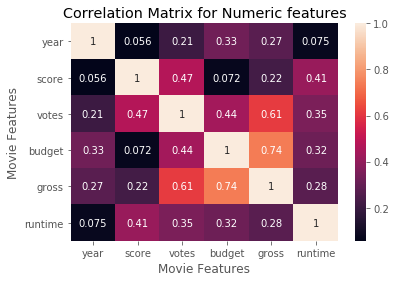

In [18]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

Observations:

1. Budget and gross are highly correlated
2. Gross and votes are correlated as well

In [19]:
df_numeric = df

for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object': #checking if column datatype is object then change it to category type
        df_numeric[col] = df_numeric[col].astype('category')
        
        #https://pbpython.com/categorical-encoding.html
        df_numeric[col] = df_numeric[col].cat.codes # encoding categorical variables to a number to perform correlation later 

df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38


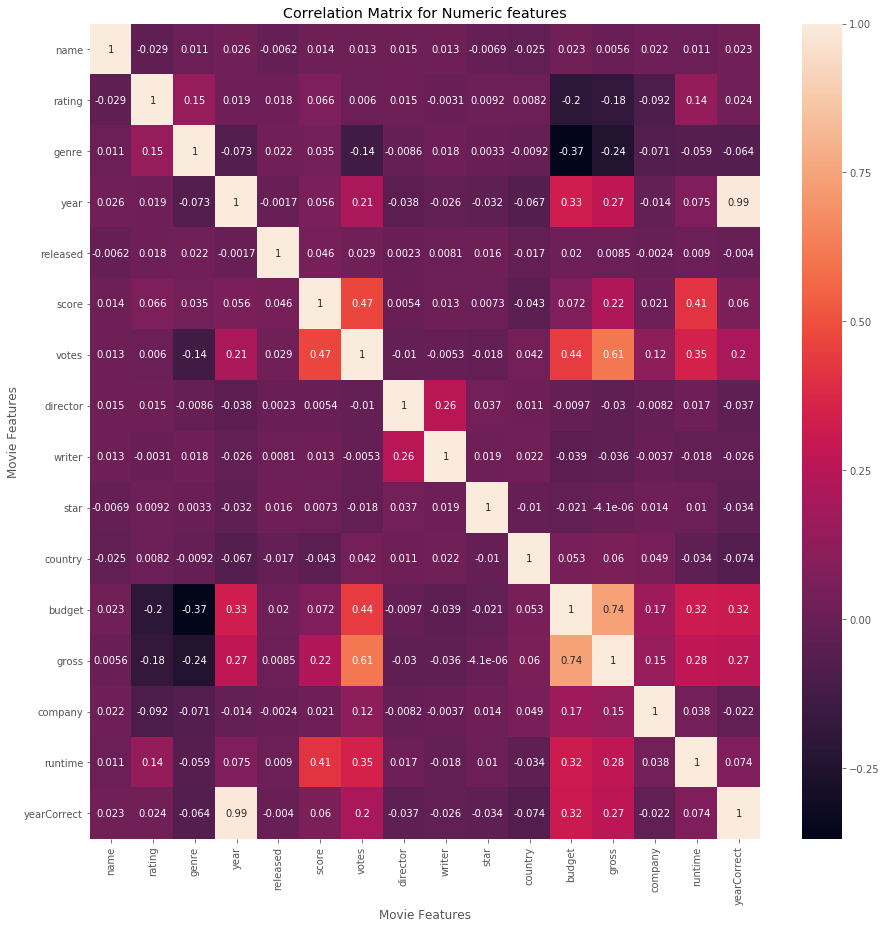

In [20]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize = (15,15)) #used for inccreasing the heatmap size
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [21]:
correlation_mat = df_numeric.corr()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
corr_pairs = correlation_mat.unstack() #unstacking to check the correlation values with each column
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearCorrect    0.023234
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearCorrect   -0.074422
yearCorrect  country       -0.074422
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        yearCorrect   -0.064308
yearCorrect  genre         -0.064308
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [23]:
#displaying only the correlation pairs with a value > 0.5
high_correlation = sorted_pairs[(sorted_pairs) > 0.5 ]
high_correlation

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearCorrect  year           0.990417
year         yearCorrect    0.990417
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64

Observation: Votes and budget have the highest correlation to gross earnings.